In [145]:
import requests
from openai import OpenAI
import pandas as pd
import os
import json
import base64
import cv2 as cv
import matplotlib.pyplot as plt 
from PIL import Image
import ast
from config import Config

In [146]:
api_key = Config["api_key"]

In [147]:
os.environ['HTTP_PROXY'] = Config["proxy1"]
os.environ['HTTPS_PROXY'] = Config["proxy2"]

In [148]:
client = OpenAI(api_key=api_key)

In [149]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [150]:
def get_message(base64_image, detail = "high"):
  tags = [
    "Transportation",
    "Real estate",
    "Personal belongings",
    "For home and cottage",
    "Spare parts and accessories",
    "Electronics",
    "Hobbies and recreation",
    "Business and equipment"
  ]

  format = {
    "Type of property":"",
    "Categories":"",
    "Characteristics":[]
  }

  completion = client.chat.completions.create(
    model="gpt-4o",
    max_tokens= 200,
    messages = [
        {
            "role": "system", 
            "content": "You are a smart assistant designed to help users sell objects in photos they provide"
        },
        {
            "role": "user", 
            "content": [
            {
              "type": "text",
              "text": f"""
            1) Determine the type of property.
            2) Which of the categories below it falls into : \n {tags} \n.
            3) Provide a list of characteristics in order that are typically required to sell this property. The characteristics should only have names, not values.
            do not write unnecessary words.
            bring back the dictionary {format}.
            """
            },
            {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}",
              "detail": detail
            }
          }
        ]
      }
    ]
  )
  return completion.choices[0].message

In [151]:
def get_features(filename):
    base64_image = encode_image(filename)
    img = cv.imread(filename)
    plt.imshow(img)

    mes = get_message(base64_image)
    print(mes)
    print(mes.content)

    info = ast.literal_eval(mes.content)

    try:
        print(f"Type of property: {info['Type of property']}")
    
    except (ValueError, SyntaxError) as er:
        print(er)
        print("No Type of property")
    
    try:
        print(f"Categories: {info['Categories']}")
    
    except (ValueError, SyntaxError) as er:
        print(er)
        print("No Categories")
    
    try:
        print(f"Characteristics: {info['Characteristics']}")
    
    except (ValueError, SyntaxError) as er:
        print(er)
        print("No Characteristics")

    return info

ChatCompletionMessage(content="{'Type of property': 'Smartphone', 'Categories': 'Electronics', 'Characteristics': ['Brand', 'Model', 'Condition', 'Color', 'Storage Capacity', 'Operating System', 'Accessories Included', 'Price', 'Contact Information']}", role='assistant', function_call=None, tool_calls=None)
{'Type of property': 'Smartphone', 'Categories': 'Electronics', 'Characteristics': ['Brand', 'Model', 'Condition', 'Color', 'Storage Capacity', 'Operating System', 'Accessories Included', 'Price', 'Contact Information']}
Type of property: Smartphone
Categories: Electronics
Characteristics: ['Brand', 'Model', 'Condition', 'Color', 'Storage Capacity', 'Operating System', 'Accessories Included', 'Price', 'Contact Information']


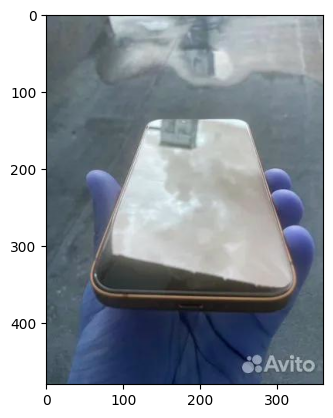

In [152]:
filename = "data/test_11.jpg"
info = get_features(filename)

ChatCompletionMessage(content="{'Type of property': 'Clothing', 'Categories': 'Personal belongings', 'Characteristics': ['Brand', 'Size', 'Color', 'Condition', 'Material', 'Style']}", role='assistant', function_call=None, tool_calls=None)
{'Type of property': 'Clothing', 'Categories': 'Personal belongings', 'Characteristics': ['Brand', 'Size', 'Color', 'Condition', 'Material', 'Style']}
Type of property: Clothing
Categories: Personal belongings
Characteristics: ['Brand', 'Size', 'Color', 'Condition', 'Material', 'Style']


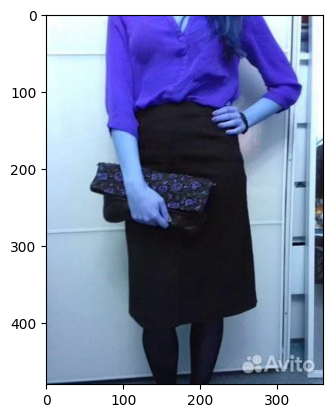

In [140]:
filename = "data/test_16.jpg"
info = get_features(filename)

ChatCompletionMessage(content="{'Type of property': 'Coffee Machine', 'Categories': 'For home and cottage', 'Characteristics': ['Brand', 'Model', 'Condition', 'Features', 'Dimensions', 'Weight']}", role='assistant', function_call=None, tool_calls=None)
{'Type of property': 'Coffee Machine', 'Categories': 'For home and cottage', 'Characteristics': ['Brand', 'Model', 'Condition', 'Features', 'Dimensions', 'Weight']}
Type of property: Coffee Machine
Categories: For home and cottage
Characteristics: ['Brand', 'Model', 'Condition', 'Features', 'Dimensions', 'Weight']


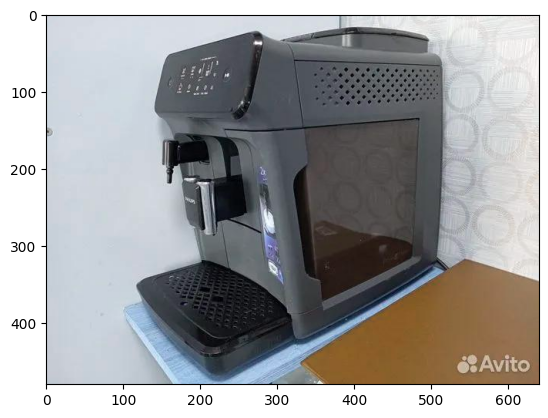

In [141]:
filename = "data/test_17.jpg"
info = get_features(filename)

ChatCompletionMessage(content="{'Type of property': 'Refrigerator', 'Categories': 'For home and cottage', 'Characteristics': ['Brand', 'Model', 'Capacity', 'Condition', 'Dimensions', 'Energy efficiency class', 'Price']}", role='assistant', function_call=None, tool_calls=None)
{'Type of property': 'Refrigerator', 'Categories': 'For home and cottage', 'Characteristics': ['Brand', 'Model', 'Capacity', 'Condition', 'Dimensions', 'Energy efficiency class', 'Price']}
Type of property: Refrigerator
Categories: For home and cottage
Characteristics: ['Brand', 'Model', 'Capacity', 'Condition', 'Dimensions', 'Energy efficiency class', 'Price']


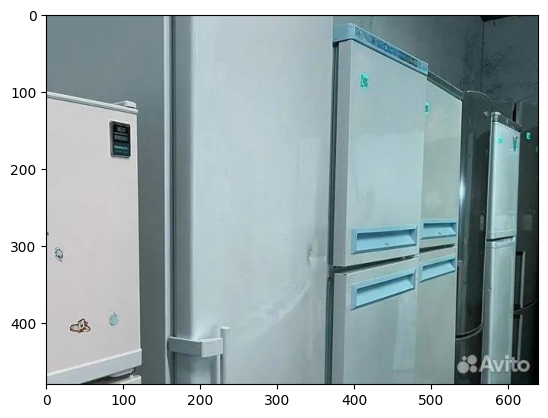

In [142]:
filename = "data/test_18.jpg"
info = get_features(filename)

In [143]:
def convert_and_rename_images(folder_path):
    # Получаем список всех файлов в папке
    files = os.listdir(folder_path)
    
    # Сортируем файлы по имени (на случай, если они в случайном порядке)
    files.sort()
    
    # Инициализируем счетчик
    counter = 1
    
    for file in files:
        # Получаем полный путь к файлу
        file_path = os.path.join(folder_path, file)
        
        # Проверяем, что это файл
        if os.path.isfile(file_path): 
            try:
                # Открываем изображение
                with Image.open(file_path) as img:
                    # Конвертируем изображение в RGB (если оно не в RGB)
                    img = img.convert("RGB")
                    
                    # Создаем новое имя файла
                    new_file_name = f"test_{counter}.jpg"
                    new_file_path = os.path.join(folder_path, new_file_name)
                    
                    # Сохраняем изображение в формате JPG
                    img.save(new_file_path, "JPEG")
                    
                    # Увеличиваем счетчик
                    counter += 1
                    
                # Удаляем исходный файл
                os.remove(file_path)
            except Exception as e:
                print(f"Ошибка при обработке файла {file_path}: {e}")

In [144]:
folder_path = "data"
# convert_and_rename_images(folder_path)